# Plant Nutrition Prediction with Supervised Machine Learning

- Objective : 
    
    1. Mengetahui variabel yang paling berpengaruh terhadap nutrisi tanaman
    2. Mengetahui hubungan antar variabel 
    3. Membuat, menguji dan memilih model yang memiliki performa optimal untuk mem-prediksi nutrisi tanaman dengan 8 variabel yang tersedia
    4. Menyajikan *continuous improvement*, baik dari segi model maupun dari segi bisnis


In [1]:
# Library Pengolahan Data
import numpy as np
import pandas as pd

# Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library Split Test dan Train
from sklearn.model_selection import train_test_split

# Library Pipeline
from sklearn.pipeline import Pipeline

# Library Scaling dan Encoding 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Library Model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Library Parameter Tuning
from sklearn.model_selection import GridSearchCV

# Library Evaluasi
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# Library Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Library Saving Model
import pickle 

# Library Balancing
import smogn

In [2]:
# Load data dengan pandas dan assign ke variabel df
df = pd.read_excel('aria_data.xlsx')

In [3]:
# Menampilkan 5 data teratas
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [4]:
# Menampilkan 5 data terakhir
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


In [5]:
# Cek data yang duplikat dengan .duplicate().sum()
df.duplicated().sum()

0

In [6]:
# Mengecek informasi dataset dengan .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


Dari informasi diatas dapat disimpulkan bahwa :
- Dataset terdiri dari 160 data
- Tidak terdapat *null values* pada dataset
- Terdapat 9 *feature numerical* (1 target, 8 variabel) dan 1 *feature categorical nominal* (lab)

In [7]:
# Copy dataset ke variabel df_eda
df_eda = df.copy()

In [8]:
# Mengecek statistik dasar dengan syntax .describe
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
target,160.0,4.733750,0.214050,4.130000,4.600000,4.720000,4.890000,5.260000
v1,160.0,389.892437,148.673511,227.285714,268.608333,295.162500,536.409375,678.375000
v2,160.0,237.442677,70.128690,178.800000,194.029018,204.187500,244.716667,422.812500
v3,160.0,480.573041,118.798984,348.933333,384.419643,414.383929,591.611404,722.312500
v4,160.0,394.109622,63.060442,313.733333,353.181250,370.741667,424.131250,558.500000
v5,160.0,487.316520,100.941711,373.333333,418.583333,456.031250,496.475000,721.000000
v6,160.0,251.450820,59.634652,189.200000,213.000000,226.062500,262.531250,415.375000
v7,160.0,714.737926,51.148098,586.266667,678.385417,718.833333,751.446875,853.466667
v8,160.0,4456.913233,335.035933,3725.666667,4273.437500,4554.766667,4700.612500,5086.375000


Dari informasi diatas dapat disimpulkan bahwa :
- Nutrisi tanaman yang diuji di lab Aria memiliki rentang nutrisi 4.13 - 5.26 dan rata-rata 4.73
- Variabel 1 dari tanaman yang diuji, memiliki rentang 227.29 - 678.38 dan rata-rata 389.89
- Variabel 2 dari tanaman yang diuji, memiliki rentang 178.8 - 422.81 dan rata-rata 237.44
- Variabel 3 dari tanaman yang diuji, memiliki rentang 348.93 - 722.31 dan rata-rata 480.57
- Variabel 4 dari tanaman yang diuji, memiliki rentang 313.73 - 558.5 dan rata-rata 394.1
- Variabel 5 dari tanaman yang diuji, memiliki rentang 373.33 - 721 dan rata-rata 487.32
- Variabel 6 dari tanaman yang diuji, memiliki rentang 189.2 - 415.38 dan rata-rata 251.45
- Variabel 7 dari tanaman yang diuji, memiliki rentang 586.27 - 853.47 dan rata-rata 714.74
- Variabel 8 dari tanaman yang diuji, memiliki rentang 3725.67 - 5086.38 dan rata-rata 4456.91


In [9]:
# Pengecekan Unique Values pada sample_type
df['sample_type'].unique()

array(['lab 1', 'lab 2'], dtype=object)

In [10]:
# Memisahkan kolom numerical dan categorical

df_num_columns = ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
df_cat_columns = ['sample_type']

# Print kolom num columns dan cat columns
print('Num Columns : ', df_num_columns)
print('Cat Columns : ', df_cat_columns)


Num Columns :  ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Cat Columns :  ['sample_type']


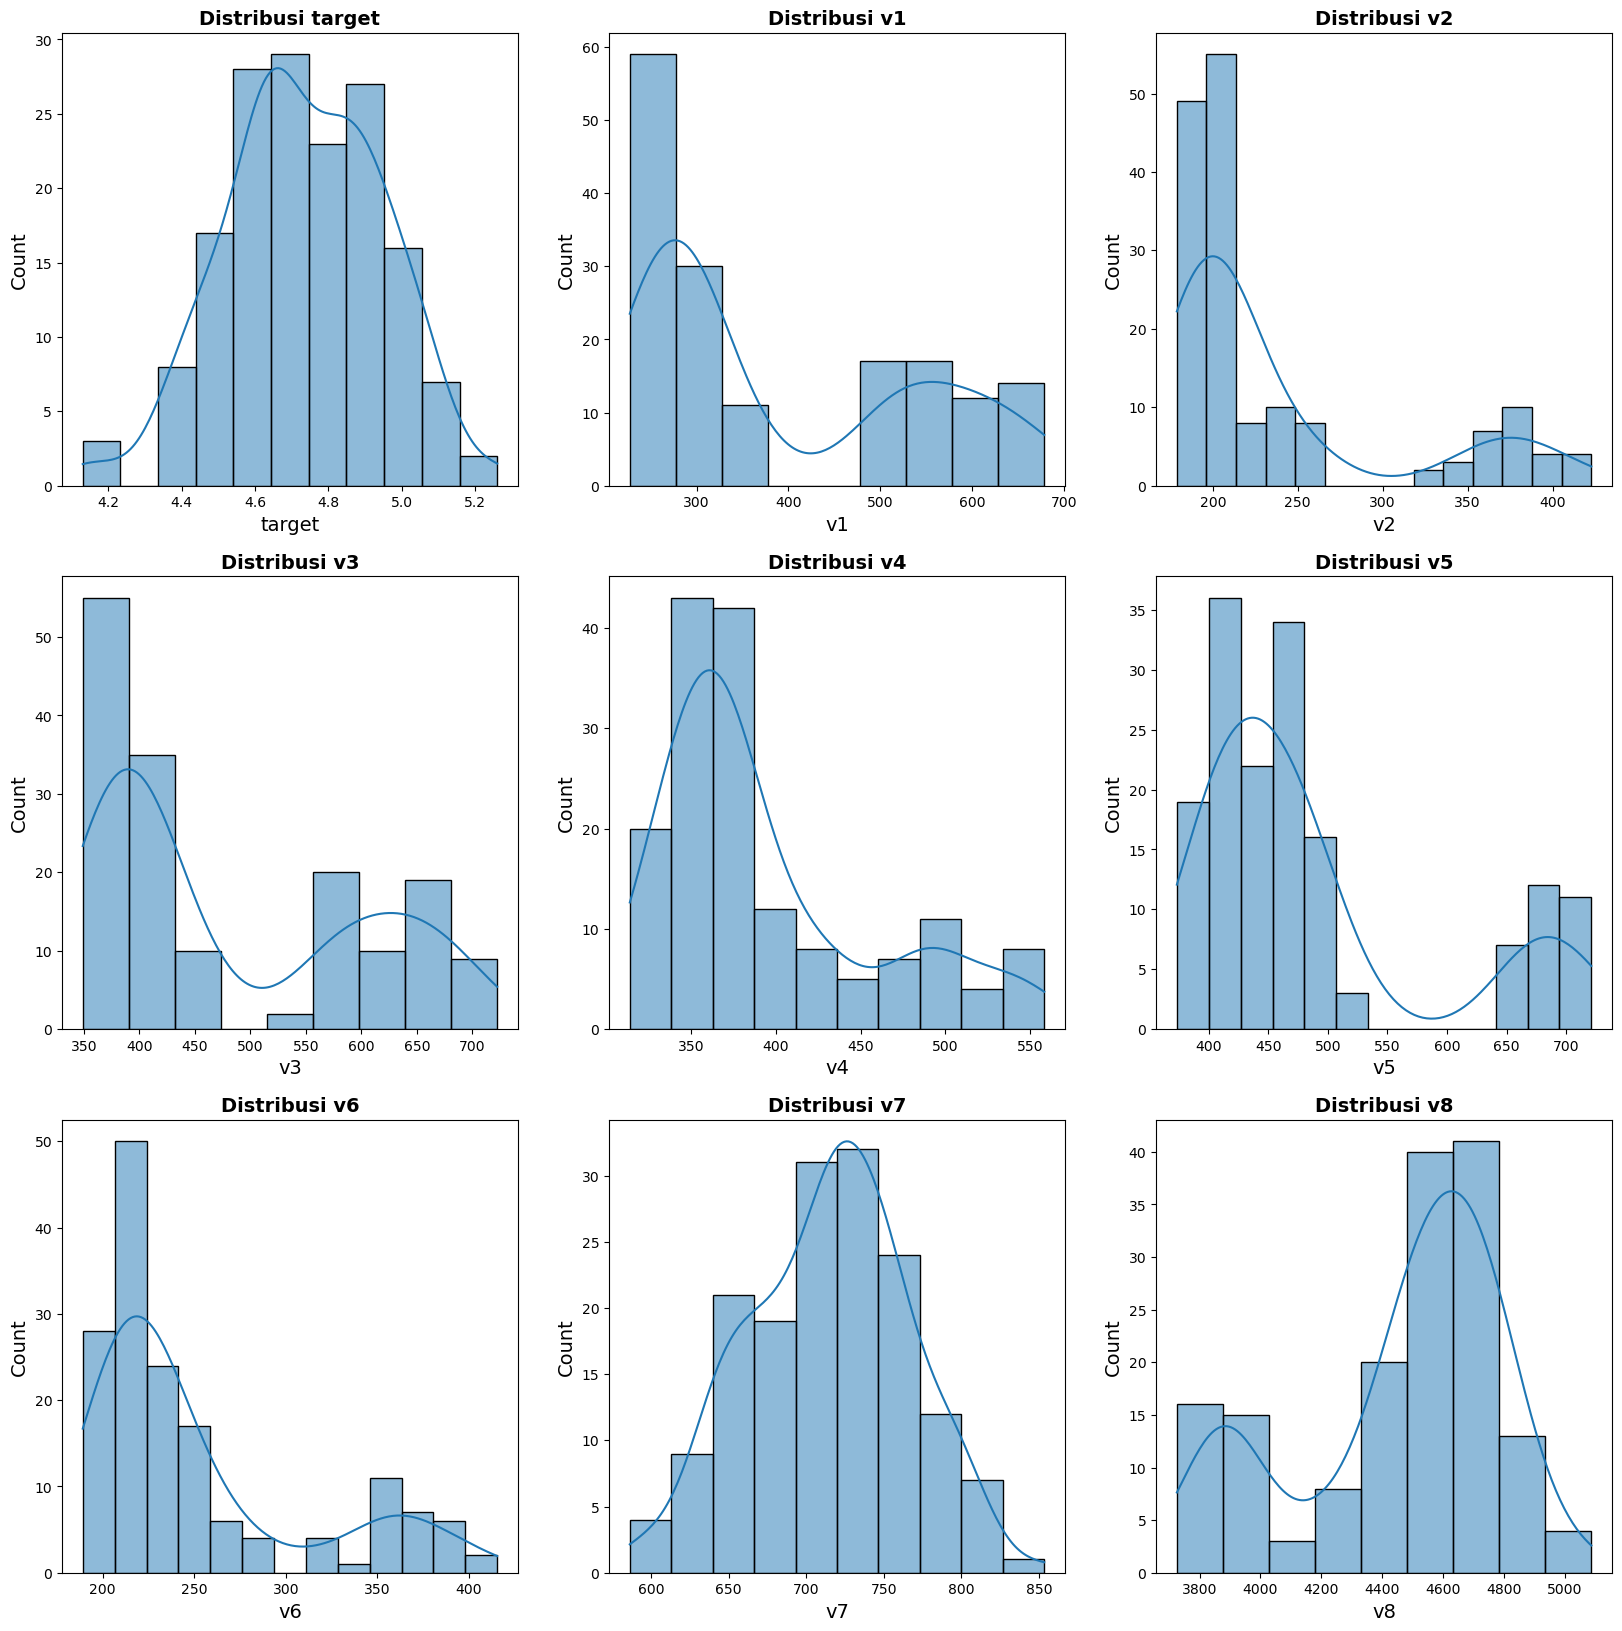

In [11]:
# Plot Distribusi
plt.figure(figsize = (20, 20))
plotnumber = 1

for col in df_num_columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(df_eda[col], kde=True)
        a = 'Distribusi ' + col
        plt.title(a, fontsize=14, fontweight='bold')
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Count', fontsize=14)
    plotnumber += 1
    
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Nutrisi tanaman banyak terpusat pada nilai 4,5 - 4,7
- Variabel 1 dari tanaman yang diuji, terpusat dibawah 300
- Variabel 2 dari tanaman yang diuji, terpusat pada 200
- Variabel 3 dari tanaman yang diuji, terpusat pada 350 - 400
- Variabel 4 dari tanaman yang diuji, terpusat pada 300 - 380
- Variabel 5 dari tanaman yang diuji, terpusat pada 400 - 420 & 450 - 470
- Variabel 6 dari tanaman yang diuji, terpusat pada 220
- Variabel 7 dari tanaman yang diuji, terpusat pada 700 - 740
- Variabel 8 dari tanaman yang diuji, terpusat pada 4.500 - 4.700

<AxesSubplot:>

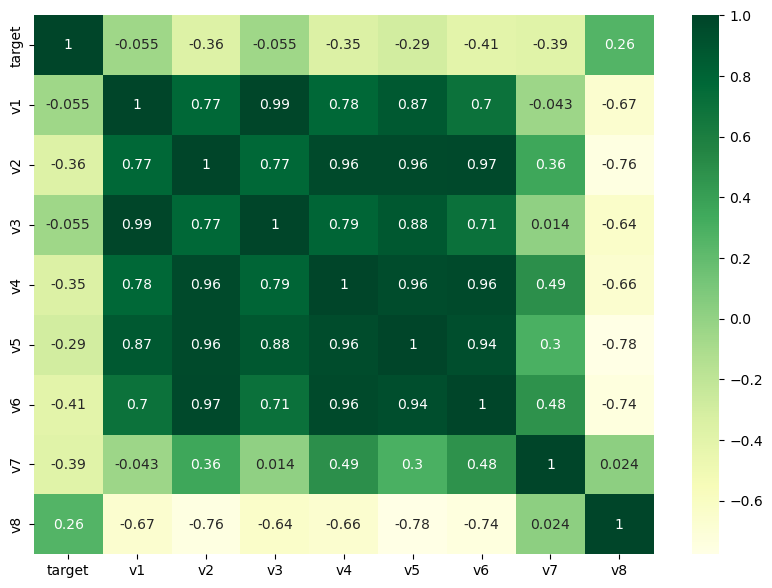

In [12]:
# Pembuatan heatmap untuk menunjukkan korelasi antar feature
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df_eda.corr(), annot = True, color = 'blue', cmap = 'YlGn')

In [13]:
# Pembuatan dataframe korelasi
corr = df_eda.corr()
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool_))
corr_triu = corr_triu.stack()

In [14]:
# Rename kolom agar lebih rapi
corr_triu.name = 'Pearson_Correlation_Coefficient'
corr_triu.index.names = ['Feature_1', 'Feature_2']

In [15]:
# Filter dataframe
corr_filter = corr_triu[(corr_triu >= 0.3) | (corr_triu <= -0.3)].to_frame()
corr_filter.reset_index(inplace=True)

In [16]:
# Pembuatan Label
conditions = [
    (corr_filter['Pearson_Correlation_Coefficient'] > 0.3) & (corr_filter['Pearson_Correlation_Coefficient'] <= 0.5),
    (corr_filter['Pearson_Correlation_Coefficient'] > 0.5) & (corr_filter['Pearson_Correlation_Coefficient'] <= 0.7),
    (corr_filter['Pearson_Correlation_Coefficient'] > 0.7) & (corr_filter['Pearson_Correlation_Coefficient'] <= 0.9),
    (corr_filter['Pearson_Correlation_Coefficient'] > 0.9) & (corr_filter['Pearson_Correlation_Coefficient'] <= 1),
    (corr_filter['Pearson_Correlation_Coefficient'] < -0.3) & (corr_filter['Pearson_Correlation_Coefficient'] >= -0.5),
    (corr_filter['Pearson_Correlation_Coefficient'] < -0.5) & (corr_filter['Pearson_Correlation_Coefficient'] >= -0.7),
    (corr_filter['Pearson_Correlation_Coefficient'] < -0.7) & (corr_filter['Pearson_Correlation_Coefficient'] >= -0.9),
    (corr_filter['Pearson_Correlation_Coefficient'] < -0.9) & (corr_filter['Pearson_Correlation_Coefficient'] >= -1),
    ]
values = ['Low_Positive_Correlation','Moderate_Positive_Correlation','High_Positive_Correlation','Very_High_Positive_Correlation',\
    'Low_Negative_Correlation','Moderate_Negative_Correlation','High_Negative_Correlation','Very_High_Negative_Correlation']

corr_filter['label'] = np.select(conditions,values)

In [17]:
# Menampilkan df korelasi
corr_filter

,Feature_1,Feature_2,Pearson_Correlation_Coefficient,label
0,target,v2,-0.361506,Low_Negative_Correlation
1,target,v4,-0.352085,Low_Negative_Correlation
2,target,v6,-0.406801,Low_Negative_Correlation
3,target,v7,-0.388306,Low_Negative_Correlation
4,v1,v2,0.774008,High_Positive_Correlation
5,v1,v3,0.988801,Very_High_Positive_Correlation
6,v1,v4,0.775818,High_Positive_Correlation
7,v1,v5,0.871424,High_Positive_Correlation
8,v1,v6,0.696396,Moderate_Positive_Correlation
9,v1,v8,-0.666113,Moderate_Negative_Correlation


Dari informasi diatas dapat disimpulkan bahwa (*summary* yang memiliki korelasi tinggi) :

1. Korelasi terhadap target :

    - Variabel 1 - Variabel 7 memiliki korelasi negatif lemah terhadap target. Korelasi negatif tertinggi ada pada Variabel 6
    - Variabel 8 memiliki korelasi positif lemah terhadap target

2. Korelasi antar variabel :
    
    - Variabel 1 memiliki korelasi positif kuat dengan Variabel 2,4,5
    - Variabel 1 memiliki korelasi positif sangat kuat dengan Variabel 3
    - Variabel 2 memiliki korelasi positif kuat dengan Variabel 3
    - Variabel 2 memiliki korelasi **negatif** kuat dengan Variabel 8
    - Variabel 2 memiliki korelasi positif sangat kuat dengan Variabel 4,5,6
    - Variabel 3 memiliki korelasi positif kuat dengan Variabel 4,5,6
    - Variabel 4 memiliki korelasi positif sangat kuat dengan Variabel 5,6
    - Variabel 5 memiliki korelasi **negatif** kuat dengan Variabel 8
    - Variabel 5 memiliki korelasi positif sangat kuat dengan Variabel 6
    - Variabel 6 memiliki korelasi **negatif** kuat dengan Variabel 8

3. Karena terdapat *multicolinearity* **maka saya akan menggunakan model yang dapat menangani multicolinearity** 

In [18]:
# Menghitung count unique value dari 'sample_type'
print(df_eda['sample_type'].value_counts())

lab 1    100
lab 2     60
Name: sample_type, dtype: int64


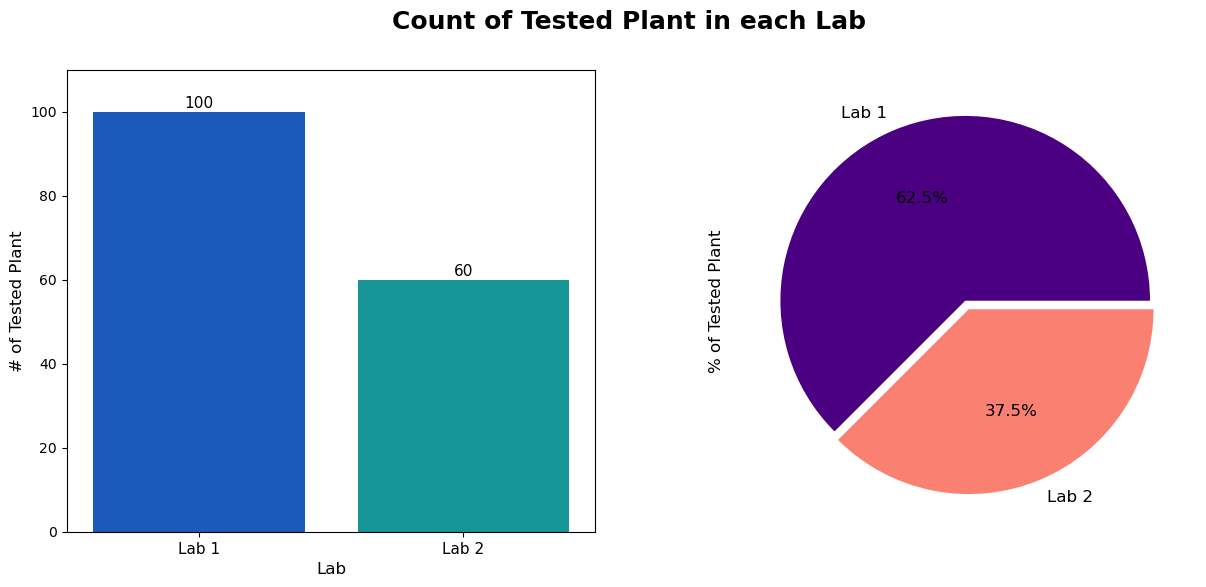

In [19]:
# Membuat visualisasi Distribusi sample_type
fig, ax =plt.subplots(1,2,figsize=(15,6))

sns.countplot(x='sample_type', data=df_eda, palette="winter", ax=ax[0])
ax[0].set_xlabel("Lab", fontsize= 12)
ax[0].set_ylabel("# of Tested Plant", fontsize= 12)
fig.suptitle('Count of Tested Plant in each Lab', fontsize=18, fontweight='bold')
ax[0].set_ylim(0,110)

ax[0].set_xticks([0,1], ['Lab 1', 'Lab 2'], fontsize = 11)
for p in ax[0].patches:
    ax[0].annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+2), ha='center', va='center',fontsize = 11) 

df_eda['sample_type'].value_counts().plot(kind='pie', labels = ['Lab 1','Lab 2'],autopct='%1.1f%%',explode = [0,0.05] ,colors = ['indigo','salmon'],textprops = {"fontsize":12})
ax[1].set_ylabel("% of Tested Plant", fontsize= 12)
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :
- Tanaman yang diuji pada Lab 1 lebih banyak dari pada lab 2 (tidak *balance*)

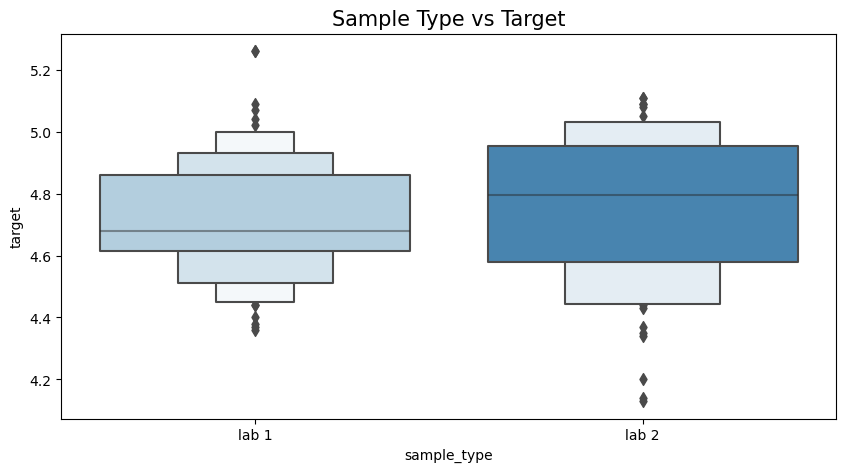

In [20]:
#  Visualisasi sample_type vs target
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxenplot(y=df_eda['target'], x= df_eda['sample_type'], palette = 'Blues')
plt.title('Sample Type vs Target', fontsize = 15)
plt.show()

Dari informasi diatas dapat disimpukkan bahwa :
- Lab 1 sering menguji tanaman dengan tingkat nutrisi 4.6 - 4.85
- Lab 2 sering menguji tanaman dengan tingkat nutrisi 4.5 - 5

In [21]:
# Definisi variabel X dan y
X = df.drop(['target'], axis=1)
y = df['target']

In [22]:
# Menampilkan X
X

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...
155,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


In [23]:
# Menampilkan y
y

0      4.63
1      5.00
2      4.91
3      4.77
4      4.89
       ... 
155    4.83
156    4.47
157    4.63
158    4.35
159    4.43
Name: target, Length: 160, dtype: float64

In [24]:
#Split X train, X test, y train dan y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (120, 9)
Test Size  :  (40, 9)


In [25]:
# print X_train
X_train

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
132,593.812500,379.625000,637.125000,489.000000,672.875000,368.375000,689.375000,3836.562500,lab 2
110,482.562500,191.312500,559.875000,353.125000,477.000000,195.250000,638.812500,4462.062500,lab 2
106,538.333333,207.000000,607.866667,383.800000,475.266667,204.800000,679.200000,4773.200000,lab 2
155,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
12,245.000000,186.285714,359.857143,320.571429,396.785714,204.000000,633.357143,4383.000000,lab 1
...,...,...,...,...,...,...,...,...,...
133,620.875000,367.000000,659.000000,480.000000,668.250000,364.062500,752.187500,3772.875000,lab 2
137,651.533333,371.600000,657.533333,485.066667,656.666667,355.533333,715.133333,3958.733333,lab 2
72,277.357143,209.428571,407.785714,386.357143,445.857143,232.785714,754.000000,4773.000000,lab 1
140,641.000000,383.400000,667.133333,535.133333,699.466667,371.466667,759.266667,3869.000000,lab 2


In [26]:
# Definisi fungsi untuk membuat boxplot dan histogram dari setiap feature numeric

def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)

    plt.show()

    # Cek skew feature
    print('\nSkewness Value ',variable, ' : ' , df[variable].skew())

In [27]:
# Memisahkan kolom numerical dan categorical

Xtrain_num_columns = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Xtrain_cat_columns = ['sample_type']

# Print kolom num columns dan cat columns
print('Xtrain Num Columns : ', Xtrain_num_columns)
print('Xtrain Cat Columns : ', Xtrain_cat_columns)

Xtrain Num Columns :  ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Xtrain Cat Columns :  ['sample_type']


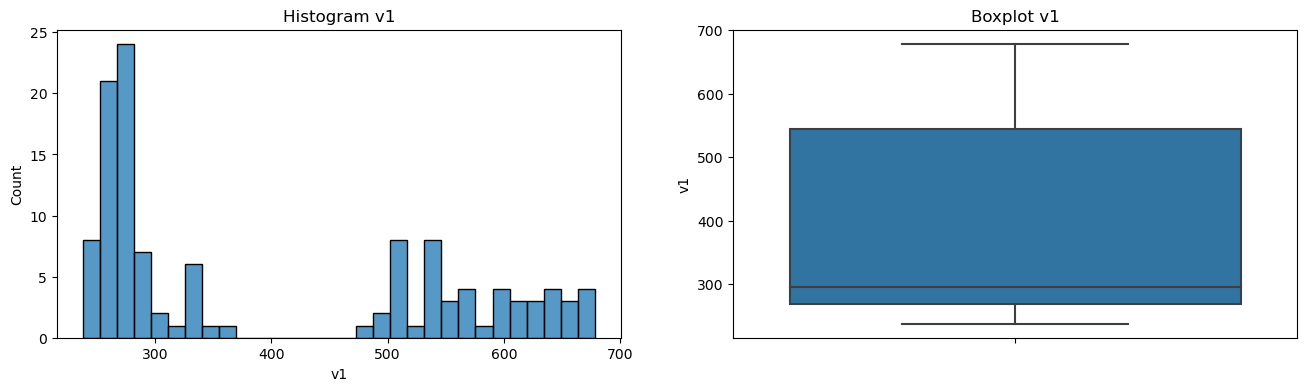


Skewness Value  v1  :  0.5050466781099159


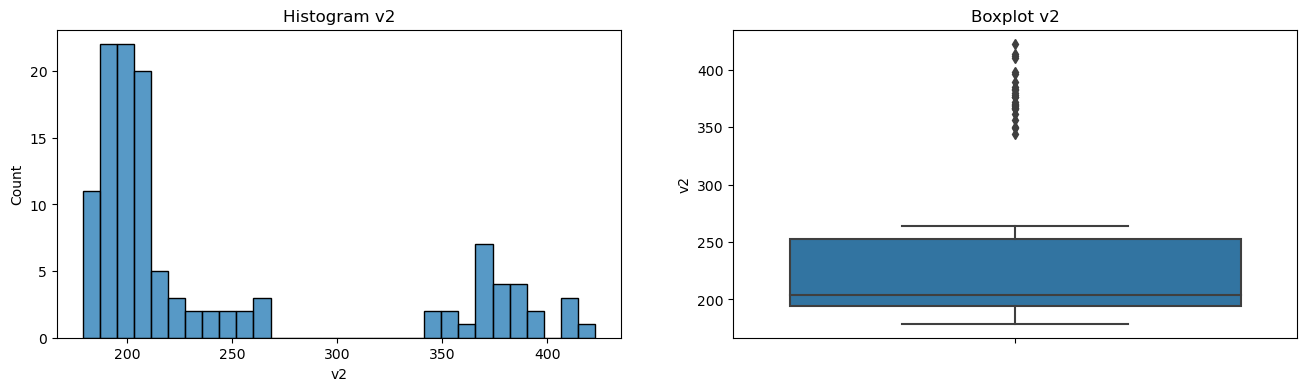


Skewness Value  v2  :  1.288427805475792


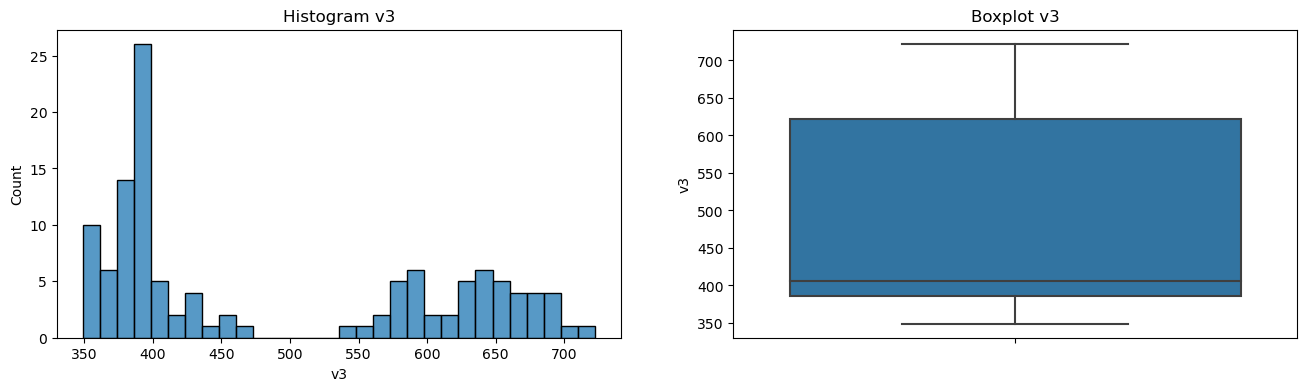


Skewness Value  v3  :  0.46937897344290924


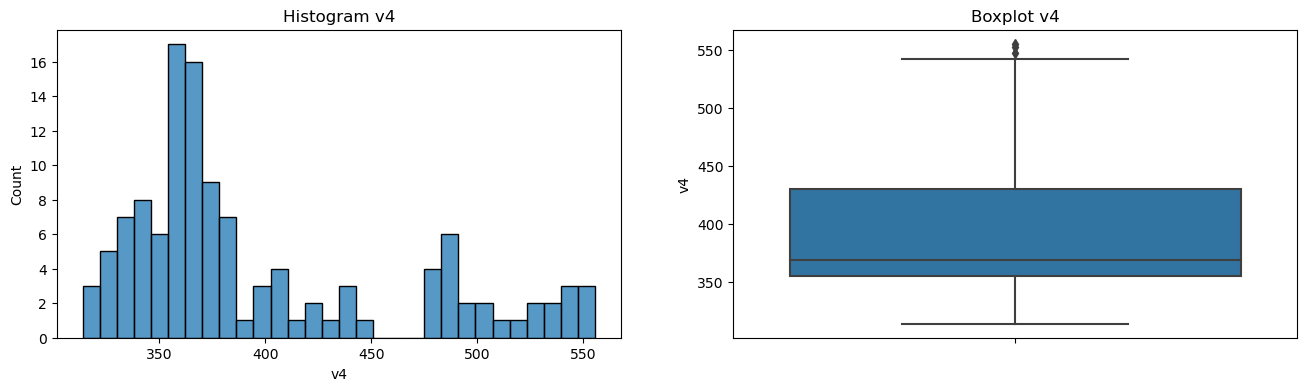


Skewness Value  v4  :  1.0541982448963638


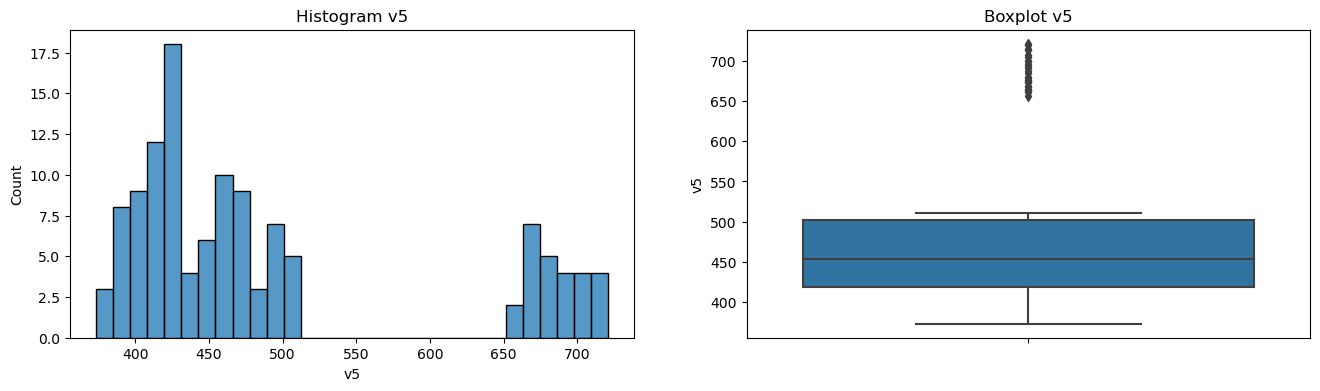


Skewness Value  v5  :  1.1186125913982807


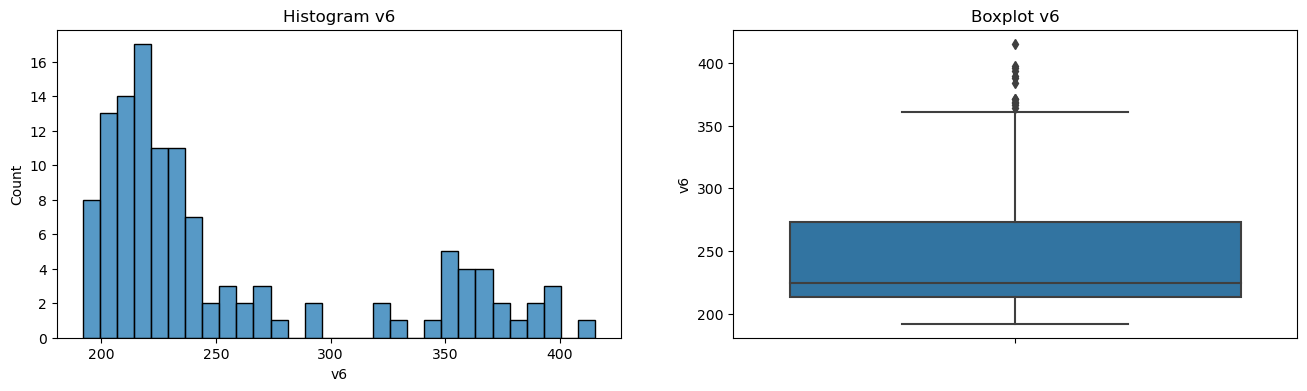


Skewness Value  v6  :  1.1891214197320026


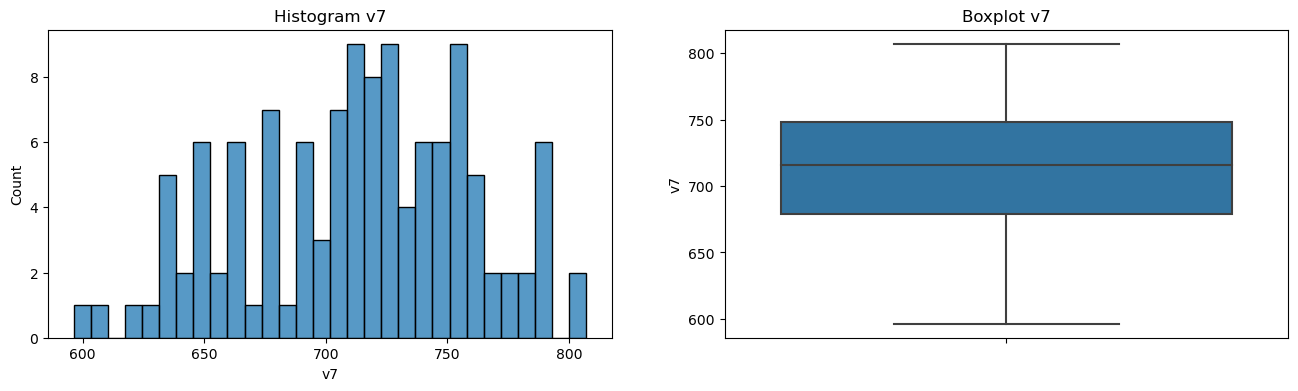


Skewness Value  v7  :  -0.2215950839967901


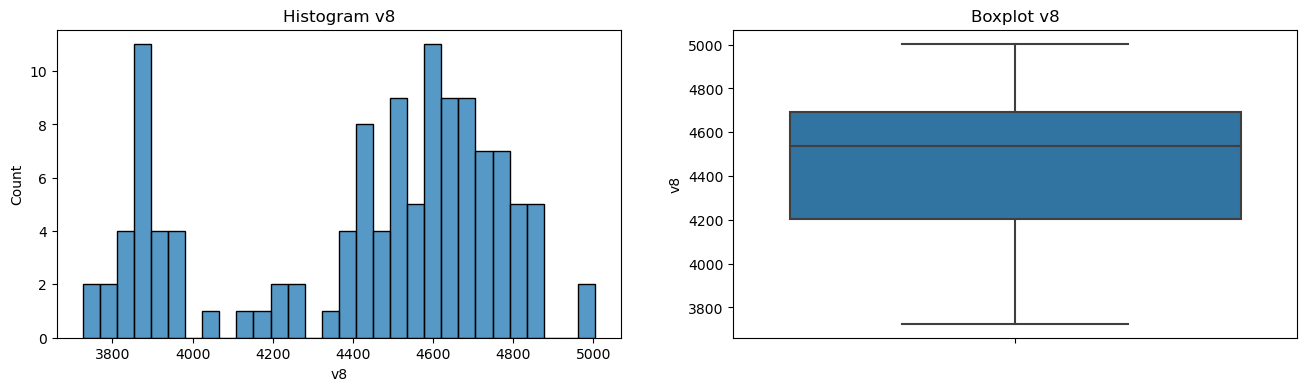


Skewness Value  v8  :  -0.6921436273153805


In [28]:
# Pengecekan distribusi dan skew dari setiap feature numeric
for i in Xtrain_num_columns:
    diagnostic_plots(X_train, i)

Dari informasi diatas dapat disimpulkan bahwa :
- Variabel 2,4,5,6 -> Extreme Right Skew
- Variabel 1 -> Right Skew
- Variabel 3,7 -> Normal
- Variabel 8 -> Left Skew

In [29]:
# Fungsi Pengecekan Outlier
def outliers_check(df,variable):
    global interq
    global lower_boundary
    global upper_boundary
    if (df[variable].skew() > 0.5 and df[variable].skew() <= 1) or (df[variable].skew() < -0.5 and df[variable].skew() >= -1):
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 1.5)
        upper_boundary = df[variable].quantile(0.75) + (interq * 1.5)
        outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]
    elif df[variable].skew() >= 1 or df[variable].skew() <= -1:
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 3)
        upper_boundary = df[variable].quantile(0.75) + (interq * 3)
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]
    else:
        lower_boundary = df[variable].mean() - (3 * df[variable].std())
        upper_boundary = df[variable].mean() + (3 * df[variable].std())
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]

    return outlier, lower_boundary, upper_boundary

In [30]:
# Pengecekan persentase outlier dari semua feature numerical
for i in Xtrain_num_columns:
    print(i)
    print('Jumlah Outlier Feature ', i,'adalah ' ,round((len(outliers_check(X_train, i)[0])),2))
    print('Persentase Outlier Feature ', i,'adalah ' ,round((len(outliers_check(X_train, i)[0])/len(X_train)*100),2))
    print('-'*50)

v1
Jumlah Outlier Feature  v1 adalah  0
Persentase Outlier Feature  v1 adalah  0.0
--------------------------------------------------
v2
Jumlah Outlier Feature  v2 adalah  0
Persentase Outlier Feature  v2 adalah  0.0
--------------------------------------------------
v3
Jumlah Outlier Feature  v3 adalah  0
Persentase Outlier Feature  v3 adalah  0.0
--------------------------------------------------
v4
Jumlah Outlier Feature  v4 adalah  0
Persentase Outlier Feature  v4 adalah  0.0
--------------------------------------------------
v5
Jumlah Outlier Feature  v5 adalah  0
Persentase Outlier Feature  v5 adalah  0.0
--------------------------------------------------
v6
Jumlah Outlier Feature  v6 adalah  0
Persentase Outlier Feature  v6 adalah  0.0
--------------------------------------------------
v7
Jumlah Outlier Feature  v7 adalah  0
Persentase Outlier Feature  v7 adalah  0.0
--------------------------------------------------
v8
Jumlah Outlier Feature  v8 adalah  0
Persentase Outlier Fea

Dari informasi diatas dapat disimpulkan bahwa :
- Tidak ada *outliers* pada semua *feature*

In [31]:
# Pengecekan null values pada X_train
X_train.isnull().sum()

v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

In [32]:
# Pengecekan null values pada y_train
y_train.isnull().sum()

0

Pada `y_train` tidak terdapat *missing values* sehingga tidak diperlukan *handling*

In [33]:
# Pengecekan null values pada X_test
X_test.isnull().sum()

v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

Pada `X_test` tidak terdapat *missing values* sehingga tidak diperlukan *handling*

In [34]:
# Pengecekan null values pada y_test
y_test.isnull().sum()

0

Pada `y_test` tidak terdapat *missing values* sehingga tidak diperlukan *handling*

In [35]:
# Copy ke variabel khusus untuk FE
X_train_FE = X_train.copy()
y_train_FE = y_train.copy()

# Memisahkan kolom Numerical dan Categorical
X_train_num_FE = X_train_FE[Xtrain_num_columns]
X_train_cat_FE = X_train_FE[Xtrain_cat_columns]

In [36]:
# Encoding menggunakan Label Encoder
encoder_FE = LabelEncoder()
encoded_FE = encoder_FE.fit_transform(np.array(X_train_cat_FE).ravel())

In [37]:
# Get Mapping
encoder_FE_name_mapping = dict(zip(encoder_FE.classes_, encoder_FE.transform(encoder_FE.classes_)))
print(encoder_FE_name_mapping)

{'lab 1': 0, 'lab 2': 1}


In [38]:
# Concat dengan y_train
num_FE =  pd.concat([X_train_num_FE, pd.DataFrame(y_train)], axis=1 )
num_FE

,v1,v2,v3,v4,v5,v6,v7,v8,target
132,593.812500,379.625000,637.125000,489.000000,672.875000,368.375000,689.375000,3836.562500,4.57
110,482.562500,191.312500,559.875000,353.125000,477.000000,195.250000,638.812500,4462.062500,4.95
106,538.333333,207.000000,607.866667,383.800000,475.266667,204.800000,679.200000,4773.200000,5.09
155,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,4.83
12,245.000000,186.285714,359.857143,320.571429,396.785714,204.000000,633.357143,4383.000000,4.85
...,...,...,...,...,...,...,...,...,...
133,620.875000,367.000000,659.000000,480.000000,668.250000,364.062500,752.187500,3772.875000,4.14
137,651.533333,371.600000,657.533333,485.066667,656.666667,355.533333,715.133333,3958.733333,4.69
72,277.357143,209.428571,407.785714,386.357143,445.857143,232.785714,754.000000,4773.000000,4.56
140,641.000000,383.400000,667.133333,535.133333,699.466667,371.466667,759.266667,3869.000000,4.52


<AxesSubplot:>

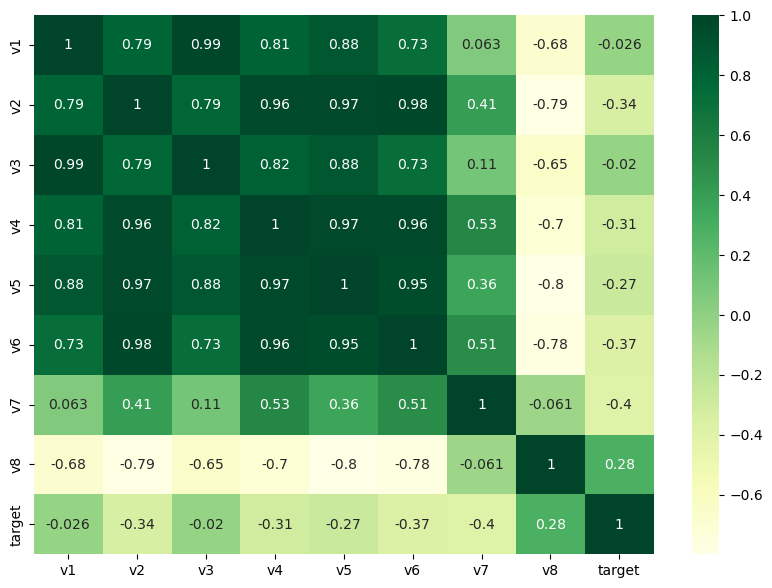

In [39]:
# Pembuatan heatmap untuk menunjukkan korelasi antar feature
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(num_FE.corr(), annot = True, color = 'blue', cmap = 'YlGn')

Berdasarkan informasi di-atas maka, **tidak ada *feature* yang di-drop karena** :
- Terdapat *multicolinearity* antar variabel yang kuat
- Oleh karena itu, model yang nanti digunkan akan di-fokuskan terhadap model yang dapat menangani *multicolinearity*

In [40]:
# Definisi filter kemudian fit encoded_FE dan y train
FE_cat_filter = SelectKBest(score_func=f_classif, k='all')
score_cat = FE_cat_filter.fit(encoded_FE.reshape(-1,1), y_train)

In [41]:
# Selanjutnya adalah print score dari feature sample_type
print('Score dari feature adalah : ', score_cat.scores_)
print('Pvalue dari feature adalah : ', score_cat.pvalues_)

Score dari feature adalah :  [1.2139715]
Pvalue dari feature adalah :  [0.23159601]


In [42]:
# # Drop sample_type pada X_train dan X_test
X_train.drop(columns=['sample_type'], inplace=True)
X_test.drop(columns=['sample_type'], inplace=True)

In [43]:
# Print Shape X_train
print(X_train.shape)

(120, 8)


Dari informasi diatas dapat disimpulkan bahwa ***feature* yang digunakan untuk *training* model adalah 8 *feature* yaitu ['v1','v2','v3', 'v4', 'v5', 'v6', 'v7', 'v8']**

In [44]:
# Cek Skew dari Setiap Feature
num_columns_final = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
for i in num_columns_final:
    print('Feature ', i)
    print('Skewness ', X_train[i].skew())
    print('-'*30)

Feature  v1
Skewness  0.5050466781099159
------------------------------
Feature  v2
Skewness  1.288427805475792
------------------------------
Feature  v3
Skewness  0.46937897344290924
------------------------------
Feature  v4
Skewness  1.0541982448963638
------------------------------
Feature  v5
Skewness  1.1186125913982807
------------------------------
Feature  v6
Skewness  1.1891214197320026
------------------------------
Feature  v7
Skewness  -0.2215950839967901
------------------------------
Feature  v8
Skewness  -0.6921436273153805
------------------------------


**Karena terdapat feature yang *extreme skew*, maka saya menggunakan `RobustScaler`**

In [45]:
# Definisi kolom final dan scaler
num_columns_final = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
numerical_transformer = RobustScaler()


In [46]:
# Pipeline Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_columns_final),
    ]
)

In [47]:
# Concat X_train dan y_train
X_y_train = pd.concat([X_train,y_train], axis=1)
X_y_train.reset_index(drop=True, inplace=True)

In [48]:
# Menampilkan hasil concat
X_y_train

,v1,v2,v3,v4,v5,v6,v7,v8,target
0,593.812500,379.625000,637.125000,489.000000,672.875000,368.375000,689.375000,3836.562500,4.57
1,482.562500,191.312500,559.875000,353.125000,477.000000,195.250000,638.812500,4462.062500,4.95
2,538.333333,207.000000,607.866667,383.800000,475.266667,204.800000,679.200000,4773.200000,5.09
3,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,4.83
4,245.000000,186.285714,359.857143,320.571429,396.785714,204.000000,633.357143,4383.000000,4.85
...,...,...,...,...,...,...,...,...,...
115,620.875000,367.000000,659.000000,480.000000,668.250000,364.062500,752.187500,3772.875000,4.14
116,651.533333,371.600000,657.533333,485.066667,656.666667,355.533333,715.133333,3958.733333,4.69
117,277.357143,209.428571,407.785714,386.357143,445.857143,232.785714,754.000000,4773.000000,4.56
118,641.000000,383.400000,667.133333,535.133333,699.466667,371.466667,759.266667,3869.000000,4.52


Kemudian saya melakukan SMOTER dengan parameter sebagai berikut :
- *Sampling Method Extreme* -> Digunakan agar algoritma bisa secara *aggresive* melakukan *oversampling*
- *Replace True* -> Digunakan agar data *outlier* yang dibuang saat proses SMOTER bisa diganti dengan data yang memiliki statistik mirip

In [49]:
# Melakukan SMOTER
X_y_smogn = smogn.smoter(data = X_y_train, y = 'target', rel_coef=1.3, replace = True, rel_thres = 1, samp_method= 'extreme')

synth_matrix: 100%|##########| 3/3 [00:00<00:00, 17.58it/s]


In [50]:
# Print len sebelum dan sesudah SMOTER
print('Len sebelum SMOTER ', len(X_y_train))
print('Len sesudah SMOTER ', len(X_y_smogn))

Len sebelum SMOTER  120
Len sesudah SMOTER  234


Dari informasi diatas dapat disimpulkan bahwa data sudah bertambah **dari awalnya 120 menjadi 234**. Selanjutnya adalah *split* data hasil SMOTER

In [51]:
# Split data hasil SMOTER
X_train_final = X_y_smogn.drop(['target'], axis=1)
X_test_final = X_test.copy()
y_train= X_y_smogn['target']

In [52]:
# Model Definition

# Pipeline Linear Regression
model_linreg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())]
)
# Pipeline KNN
model_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsRegressor())]
)
# Pipeline SVR
model_svr = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVR())]
)
# Pipeline Bayes
model_bayes = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", BayesianRidge())]
)
# Pipeline Decision Tree
model_tree = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeRegressor(random_state=2))]
)
# Pipeline Random Forest
model_forest = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestRegressor(random_state=3))]
)
# Pipeline XGBoost
model_xgboost = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", GradientBoostingRegressor(random_state=4))]
)
# Pipeline ADABoost
model_ada = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", AdaBoostRegressor(random_state=5))]
)


In [53]:
# Fit X_train & y_train ke model
model_linreg.fit(X_train_final, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8'])])),
                ('classifier', LinearRegression())])

In [54]:
# Predict y_train & y_test
y_train_pred_linreg = model_linreg.predict(X_train_final)
y_test_pred_linreg = model_linreg.predict(X_test_final)

In [55]:
# Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', round(min(y_test),2))
print('Nilai max test-set ', round(max(y_test),2))
print('Nilai rata-rata test-set ', round(y_test.mean(),2))
print('-'*30)
print('Pred-Set')
print('Nilai min pred ', round(min(y_test_pred_linreg),2))
print('Nilai max pred ', round(max(y_test_pred_linreg),2))
print('Nilai rata-rata pred ', round(y_test_pred_linreg.mean(),2))

Test-Set
Nilai min test-set  4.34
Nilai max test-set  5.26
Nilai rata-rata test-set  4.77
------------------------------
Pred-Set
Nilai min pred  4.16
Nilai max pred  5.2
Nilai rata-rata pred  4.68


In [56]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih dan jumlah prediksi yang kurang
linreg_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_test_pred_linreg})
linreg_pred['indicator'] = np.where(linreg_pred['prediction'] > linreg_pred['actual'], 'higher', 'lower')
linreg_pred_group = linreg_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
linreg_pred_group

,indicator,counts
1,lower,26
0,higher,14


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata prediksi lebih rendah dari pada aktual
- Model memprediksi nilai nutrisi dengan *range* 4,16 - 5,2 sedangkan aktual yang di gunakan untuk *test* ada pada *range* 4,34 - 5,26
- Model cenderung memprediksi lebih rendah dari nilai aktual

In [57]:
# Model Evaluation - Train Set
scores_linreg=cross_val_score(model_linreg,X_train_final,y_train,cv=5,scoring="neg_mean_absolute_error")*-1

print('MAE - Mean - Cross Validation : ', scores_linreg.mean())
print('MAE - Std - Cross Validation : ', scores_linreg.std())
print('MAE - Range of Train-Set : ', (scores_linreg.mean()-scores_linreg.std()) , '-', (scores_linreg.mean()+scores_linreg.std()))

MAE - Mean - Cross Validation :  0.1468934629615098
MAE - Std - Cross Validation :  0.03750735461155653
MAE - Range of Train-Set :  0.10938610834995327 - 0.1844008175730663


In [58]:
# Evaluasi berdasarkan metrics
mae_train_linreg = mean_absolute_error(y_train, y_train_pred_linreg)
mae_test_linreg = mean_absolute_error(y_test, y_test_pred_linreg)

print('Linear Regression')
print('MAE train = ', mae_train_linreg)
print('MAE test = ', mae_test_linreg)

Linear Regression
MAE train =  0.11797475516058473
MAE test =  0.2015885799133562


Dari informasi diatas dapat disimpulkan bahwa :

- Model termasuk dalam kategori ***overfit*** karena nilai MAE train lebih kecil dari pada MAE test
- Setelah dilakukan *validasi* dengan *cross-validation*,  nilai MAE tidak berbeda jauh dengan 1x *training*. **Artinya nilai MAE pada *train-set* valid**
- Model ini memiliki error sejumlah +- 0,20. Contohnya jika hasil prediksi nutrisi adalah 4 maka ada kemungkinan nutrisi aktualnya 4,20 atau bisa juga 3,80

In [59]:
# Fit X_train & y_train ke model
model_knn.fit(X_train_final, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8'])])),
                ('classifier', KNeighborsRegressor())])

Kemudian prediksi pada `X_train_final` dan `X_test_final` untuk persiapan evaluasi

In [60]:
# Predict y_train & y_test
y_train_pred_knn = model_knn.predict(X_train_final)
y_test_pred_knn = model_knn.predict(X_test_final)

In [61]:
# Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', round(min(y_test),2))
print('Nilai max test-set ', round(max(y_test),2))
print('Nilai rata-rata test-set ', round(y_test.mean(),2))
print('-'*30)
print('Pred-Set')
print('Nilai min pred ', round(min(y_test_pred_knn),2))
print('Nilai max pred ', round(max(y_test_pred_knn),2))
print('Nilai rata-rata pred ', round(y_test_pred_knn.mean(),2))

Test-Set
Nilai min test-set  4.34
Nilai max test-set  5.26
Nilai rata-rata test-set  4.77
------------------------------
Pred-Set
Nilai min pred  4.49
Nilai max pred  4.99
Nilai rata-rata pred  4.72


In [62]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih dan jumlah prediksi yang kurang
knn_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_test_pred_knn})
knn_pred['indicator'] = np.where(knn_pred['prediction'] > knn_pred['actual'], 'higher', 'lower')
knn_pred_group = knn_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
knn_pred_group

,indicator,counts
1,lower,23
0,higher,17


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata prediksi lebih rendah dari pada aktual
- Model memprediksi nilai nutrisi dengan *range* 4,49 - 4,99 sedangkan aktual yang di gunakan untuk *test* ada pada *range* 4,34 - 5,26
- Model cenderung memprediksi lebih rendah dari nilai aktual

In [63]:
# Model Evaluation - Train Set
scores_knn=cross_val_score(model_knn,X_train_final,y_train,cv=5,scoring="neg_mean_absolute_error")*-1

print('MAE - Mean - Cross Validation : ', scores_knn.mean())
print('MAE - Std - Cross Validation : ', scores_knn.std())
print('MAE - Range of Train-Set : ', (scores_knn.mean()-scores_knn.std()) , '-', (scores_knn.mean()+scores_knn.std()))

MAE - Mean - Cross Validation :  0.13069156169038
MAE - Std - Cross Validation :  0.0773460358323251
MAE - Range of Train-Set :  0.05334552585805488 - 0.2080375975227051


In [64]:
# Evaluasi berdasarkan metrics
mae_train_knn = mean_absolute_error(y_train, y_train_pred_knn)
mae_test_knn = mean_absolute_error(y_test, y_test_pred_knn)

print('KNN')
print('MAE train = ', mae_train_knn)
print('MAE test = ', mae_test_knn)

KNN
MAE train =  0.06727369486988474
MAE test =  0.14404777552746875


Dari informasi diatas dapat disimpulkan bahwa :

- Model termasuk dalam kategori ***overfit*** karena nilai MAE train lebih kecil dari pada MAE Test
- Setelah dilakukan *validasi* dengan *cross-validation*, nilai MAE berbeda jauh dengan 1x *training*. **Artinya nilai MAE pada *train-set* tidak valid**
- Model ini memiliki error sejumlah +- 0,14. Contohnya jika hasil prediksi nutrisi adalah 4 maka ada kemungkinan nutrisi aktualnya 4,14 atau bisa juga 3,86

In [65]:
# Fit X_train & y_train ke model
model_svr.fit(X_train_final, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8'])])),
                ('classifier', SVR())])

In [66]:
# Predict y_train & y_test
y_train_pred_svr = model_svr.predict(X_train_final)
y_test_pred_svr = model_svr.predict(X_test_final)

In [67]:
# Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', round(min(y_test),2))
print('Nilai max test-set ', round(max(y_test),2))
print('Nilai rata-rata test-set ', round(y_test.mean(),2))
print('-'*30)
print('Pred-Set')
print('Nilai min pred ', round(min(y_test_pred_svr),2))
print('Nilai max pred ', round(max(y_test_pred_svr),2))
print('Nilai rata-rata pred ', round(y_test_pred_svr.mean(),2))

Test-Set
Nilai min test-set  4.34
Nilai max test-set  5.26
Nilai rata-rata test-set  4.77
------------------------------
Pred-Set
Nilai min pred  4.42
Nilai max pred  4.97
Nilai rata-rata pred  4.74


In [68]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih dan jumlah prediksi yang kurang
svr_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_test_pred_svr})
svr_pred['indicator'] = np.where(svr_pred['prediction'] > svr_pred['actual'], 'higher', 'lower')
svr_pred_group = svr_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
svr_pred_group

,indicator,counts
1,lower,21
0,higher,19


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata prediksi lebih rendah dari pada aktual
- Model memprediksi nilai nutrisi dengan *range* 4,42 - 4,97 sedangkan aktual yang di gunakan untuk *test* ada pada *range* 4,34 - 5,26
- Model cenderung memprediksi lebih rendah dari nilai aktual

In [69]:
# Model Evaluation - Train Set
scores_svr=cross_val_score(model_svr,X_train_final,y_train,cv=5,scoring="neg_mean_absolute_error")*-1

print('MAE - Mean - Cross Validation : ', scores_svr.mean())
print('MAE - Std - Cross Validation : ', scores_svr.std())
print('MAE - Range of Train-Set : ', (scores_svr.mean()-scores_svr.std()) , '-', (scores_svr.mean()+scores_svr.std()))

MAE - Mean - Cross Validation :  0.12807975208100536
MAE - Std - Cross Validation :  0.024453236526519675
MAE - Range of Train-Set :  0.10362651555448568 - 0.15253298860752504


In [70]:
# Evaluasi berdasarkan metrics
mae_train_svr = mean_absolute_error(y_train, y_train_pred_svr)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)

print('SVR')
print('MAE train = ', mae_train_svr)
print('MAE test = ', mae_test_svr)

SVR
MAE train =  0.11272995425247073
MAE test =  0.14286209606105643


Dari informasi diatas dapat disimpulkan bahwa :

- Model termasuk dalam kategori ***goodfit*** karena nilai MAE train dan MAE test tidak jauh berbeda
- Setelah dilakukan *validasi* dengan *cross-validation*, nilai MAE tidak berbeda jauh dengan 1x *training*. **Artinya nilai MAE pada *train-set* valid**
- Model ini memiliki error sejumlah +- 0,14. Contohnya jika hasil prediksi nutrisi adalah 4 maka ada kemungkinan nutrisi aktualnya 4,14 atau bisa juga 3,86

In [71]:
# Fit X_train & y_train ke model
model_bayes.fit(X_train_final, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8'])])),
                ('classifier', BayesianRidge())])

In [72]:
# Predict y_train & y_test
y_train_pred_bayes = model_bayes.predict(X_train_final)
y_test_pred_bayes = model_bayes.predict(X_test_final)

In [73]:
# Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', round(min(y_test),2))
print('Nilai max test-set ', round(max(y_test),2))
print('Nilai rata-rata test-set ', round(y_test.mean(),2))
print('-'*30)
print('Pred-Set')
print('Nilai min pred ', round(min(y_test_pred_bayes),2))
print('Nilai max pred ', round(max(y_test_pred_bayes),2))
print('Nilai rata-rata pred ', round(y_test_pred_bayes.mean(),2))

Test-Set
Nilai min test-set  4.34
Nilai max test-set  5.26
Nilai rata-rata test-set  4.77
------------------------------
Pred-Set
Nilai min pred  4.18
Nilai max pred  5.16
Nilai rata-rata pred  4.68


In [74]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih dan jumlah prediksi yang kurang
bayes_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_test_pred_bayes})
bayes_pred['indicator'] = np.where(bayes_pred['prediction'] > bayes_pred['actual'], 'higher', 'lower')
bayes_pred_group = bayes_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
bayes_pred_group

,indicator,counts
1,lower,25
0,higher,15


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata prediksi lebih rendah dari pada aktual
- Model memprediksi nilai nutrisi dengan *range* 4,18 - 5,16 sedangkan aktual yang di gunakan untuk *test* ada pada *range* 4,34 - 5,26
- Model cenderung memprediksi lebih rendah dari nilai aktual

In [75]:
# Model Evaluation - Train Set
scores_bayes=cross_val_score(model_bayes,X_train_final,y_train,cv=5,scoring="neg_mean_absolute_error")*-1

print('MAE - Mean - Cross Validation : ', scores_bayes.mean())
print('MAE - Std - Cross Validation : ', scores_bayes.std())
print('MAE - Range of Train-Set : ', (scores_bayes.mean()-scores_bayes.std()) , '-', (scores_bayes.mean()+scores_bayes.std()))

MAE - Mean - Cross Validation :  0.15007595595495177
MAE - Std - Cross Validation :  0.03328714301589997
MAE - Range of Train-Set :  0.1167888129390518 - 0.18336309897085173


In [76]:
# Evaluasi berdasarkan metrics
mae_train_bayes = mean_absolute_error(y_train, y_train_pred_bayes)
mae_test_bayes = mean_absolute_error(y_test, y_test_pred_bayes)

print('Bayes')
print('MAE train = ', mae_train_bayes)
print('MAE test = ', mae_test_bayes)

Bayes
MAE train =  0.11955113219658128
MAE test =  0.1911895012474409


Dari informasi diatas dapat disimpulkan bahwa :

- Model termasuk dalam kategori ***overfit*** karena nilai MAE train lebih rendah dari pada MAE test
- Setelah dilakukan *validasi* dengan *cross-validation*, nilai MAE tidak berbeda jauh dengan 1x *training*. **Artinya nilai MAE pada *train-set* valid**
- Model ini memiliki error sejumlah +- 0,19. Contohnya jika hasil prediksi nutrisi adalah 4 maka ada kemungkinan nutrisi aktualnya 4,19 atau bisa juga 3,81

In [77]:
# Fit X_train & y_train ke model
model_tree.fit(X_train_final, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8'])])),
                ('classifier', DecisionTreeRegressor(random_state=2))])

In [78]:
# Predict y_train & y_test
y_train_pred_tree = model_tree.predict(X_train_final)
y_test_pred_tree = model_tree.predict(X_test_final)

In [79]:
# Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', round(min(y_test),2))
print('Nilai max test-set ', round(max(y_test),2))
print('Nilai rata-rata test-set ', round(y_test.mean(),2))
print('-'*30)
print('Pred-Set')
print('Nilai min pred ', round(min(y_test_pred_tree),2))
print('Nilai max pred ', round(max(y_test_pred_tree),2))
print('Nilai rata-rata pred ', round(y_test_pred_tree.mean(),2))

Test-Set
Nilai min test-set  4.34
Nilai max test-set  5.26
Nilai rata-rata test-set  4.77
------------------------------
Pred-Set
Nilai min pred  4.35
Nilai max pred  5.09
Nilai rata-rata pred  4.73


In [80]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih dan jumlah prediksi yang kurang
tree_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_test_pred_tree})
tree_pred['indicator'] = np.where(tree_pred['prediction'] > tree_pred['actual'], 'higher', 'lower')
tree_pred_group = tree_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
tree_pred_group

,indicator,counts
0,higher,23
1,lower,17


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata prediksi lebih rendah dari pada aktual
- Model memprediksi nilai nutrisi dengan *range* 4,35 - 5,09 sedangkan aktual yang di gunakan untuk *test* ada pada *range* 4,34 - 5,26
- Model cenderung memprediksi lebih tinggi dari nilai aktual

In [81]:
# Model Evaluation - Train Set
scores_tree=cross_val_score(model_tree,X_train_final,y_train,cv=5,scoring="neg_mean_absolute_error")*-1

print('MAE - Mean - Cross Validation : ', scores_tree.mean())
print('MAE - Std - Cross Validation : ', scores_tree.std())
print('MAE - Range of Train-Set : ', (scores_tree.mean()-scores_tree.std()) , '-', (scores_tree.mean()+scores_tree.std()))

MAE - Mean - Cross Validation :  0.09578431936384771
MAE - Std - Cross Validation :  0.0828141485554148
MAE - Range of Train-Set :  0.012970170808432907 - 0.1785984679192625


In [82]:
# Evaluasi berdasarkan metrics
mae_train_tree = mean_absolute_error(y_train, y_train_pred_tree)
mae_test_tree = mean_absolute_error(y_test, y_test_pred_tree)

print('Decision Tree')
print('MAE train = ', mae_train_tree)
print('MAE test = ', mae_test_tree)

Decision Tree
MAE train =  2.651382437438556e-10
MAE test =  0.1557499999999999


Dari informasi diatas dapat disimpulkan bahwa :

- Model termasuk dalam kategori ***overfit*** karena nilai MAE train lebih kecil dari pada MAE test
- Setelah dilakukan *validasi* dengan *cross-validation*, nilai MAE berbeda dengan 1x *training*. **Artinya nilai MAE pada *train-set* tidak valid**
- Model ini memiliki error sejumlah +- 0,15. Contohnya jika hasil prediksi nutrisi adalah 4 maka ada kemungkinan nutrisi aktualnya 4,15 atau bisa juga 3,85

In [83]:
# Fit X_train & y_train ke model
model_forest.fit(X_train_final, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8'])])),
                ('classifier', RandomForestRegressor(random_state=3))])

In [84]:
# Predict y_train & y_test
y_train_pred_forest = model_forest.predict(X_train_final)
y_test_pred_forest = model_forest.predict(X_test_final)

In [85]:
# Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', round(min(y_test),2))
print('Nilai max test-set ', round(max(y_test),2))
print('Nilai rata-rata test-set ', round(y_test.mean(),2))
print('-'*30)
print('Pred-Set')
print('Nilai min pred ', round(min(y_test_pred_forest),2))
print('Nilai max pred ', round(max(y_test_pred_forest),2))
print('Nilai rata-rata pred ', round(y_test_pred_forest.mean(),2))

Test-Set
Nilai min test-set  4.34
Nilai max test-set  5.26
Nilai rata-rata test-set  4.77
------------------------------
Pred-Set
Nilai min pred  4.47
Nilai max pred  4.97
Nilai rata-rata pred  4.74


In [86]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih dan jumlah prediksi yang kurang
forest_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_test_pred_forest})
forest_pred['indicator'] = np.where(forest_pred['prediction'] > forest_pred['actual'], 'higher', 'lower')
forest_pred_group = forest_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
forest_pred_group

,indicator,counts
1,lower,22
0,higher,18


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata prediksi lebih rendah dari pada aktual
- Model memprediksi nilai nutrisi dengan *range* 4,47 - 4,97 sedangkan aktual yang di gunakan untuk *test* ada pada *range* 4,34 - 5,26
- Model cenderung memprediksi lebih rendah dari nilai aktual

In [87]:
# Model Evaluation - Train Set
scores_forest=cross_val_score(model_forest,X_train_final,y_train,cv=5,scoring="neg_mean_absolute_error")*-1

print('MAE - Mean - Cross Validation : ', scores_forest.mean())
print('MAE - Std - Cross Validation : ', scores_forest.std())
print('MAE - Range of Train-Set : ', (scores_forest.mean()-scores_forest.std()) , '-', (scores_forest.mean()+scores_forest.std()))

MAE - Mean - Cross Validation :  0.09032972419358078
MAE - Std - Cross Validation :  0.057695612610616356
MAE - Range of Train-Set :  0.03263411158296442 - 0.14802533680419713


In [88]:
# Evaluasi berdasarkan metrics
mae_train_forest = mean_absolute_error(y_train, y_train_pred_forest)
mae_test_forest = mean_absolute_error(y_test, y_test_pred_forest)

print('Random Forest')
print('MAE train = ', mae_train_forest)
print('MAE test = ', mae_test_forest)

Random Forest
MAE train =  0.029820580063755115
MAE test =  0.12505252254969892


Dari informasi diatas dapat disimpulkan bahwa :

- Setelah dilakukan *validasi* dengan *cross-validation*, nilai MAE tidak berbeda jauh dengan 1x *training*. **Artinya nilai MAE pada *train-set* valid**
- Model ini memiliki error sejumlah +- 0,12. Contohnya jika hasil prediksi nutrisi adalah 4 maka ada kemungkinan nutrisi aktualnya 4,12 atau bisa juga 3,88

In [89]:
# Fit X_train & y_train ke model
model_xgboost.fit(X_train_final, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8'])])),
                ('classifier', GradientBoostingRegressor(random_state=4))])

In [90]:
# Predict y_train & y_test
y_train_pred_xgboost = model_xgboost.predict(X_train_final)
y_test_pred_xgboost = model_xgboost.predict(X_test_final)

In [91]:
# Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', round(min(y_test),2))
print('Nilai max test-set ', round(max(y_test),2))
print('Nilai rata-rata test-set ', round(y_test.mean(),2))
print('-'*30)
print('Pred-Set')
print('Nilai min pred ', round(min(y_test_pred_xgboost),2))
print('Nilai max pred ', round(max(y_test_pred_xgboost),2))
print('Nilai rata-rata pred ', round(y_test_pred_xgboost.mean(),2))

Test-Set
Nilai min test-set  4.34
Nilai max test-set  5.26
Nilai rata-rata test-set  4.77
------------------------------
Pred-Set
Nilai min pred  4.46
Nilai max pred  4.98
Nilai rata-rata pred  4.74


In [92]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih dan jumlah prediksi yang kurang
xgboost_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_test_pred_xgboost})
xgboost_pred['indicator'] = np.where(xgboost_pred['prediction'] > xgboost_pred['actual'], 'higher', 'lower')
xgboost_pred_group = xgboost_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
xgboost_pred_group

,indicator,counts
1,lower,23
0,higher,17


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata prediksi lebih rendah dari pada aktual
- Model memprediksi nilai nutrisi dengan *range* 4,46 - 4,98 sedangkan aktual yang di gunakan untuk *test* ada pada *range* 4,34 - 5,26
- Model cenderung memprediksi lebih rendah dari nilai aktual

In [93]:
# Model Evaluation - Train Set
scores_xgboost=cross_val_score(model_xgboost,X_train_final,y_train,cv=5,scoring="neg_mean_absolute_error")*-1

print('MAE - Mean - Cross Validation : ', scores_xgboost.mean())
print('MAE - Std - Cross Validation : ', scores_xgboost.std())
print('MAE - Range of Train-Set : ', (scores_xgboost.mean()-scores_xgboost.std()) , '-', (scores_xgboost.mean()+scores_xgboost.std()))

MAE - Mean - Cross Validation :  0.09009926422911509
MAE - Std - Cross Validation :  0.06147625449076485
MAE - Range of Train-Set :  0.028623009738350233 - 0.15157551871987995


In [94]:
# Evaluasi berdasarkan metrics
mae_train_xgboost = mean_absolute_error(y_train, y_train_pred_xgboost)
mae_test_xgboost = mean_absolute_error(y_test, y_test_pred_xgboost)

print('XGBoost')
print('MAE train = ', mae_train_xgboost)
print('MAE test = ', mae_test_xgboost)

XGBoost
MAE train =  0.020985328762069648
MAE test =  0.1360565470451804


Dari informasi diatas dapat disimpulkan bahwa :

- Model termasuk dalam kategori ***overfit*** karena MAE train memiliki nilai yang lebih rendah dari pada MAE test
- Setelah dilakukan *validasi* dengan *cross-validation*, nilai MAE tidak berbeda jauh dengan 1x *training*. **Artinya nilai MAE pada *train-set* valid**
- Model ini memiliki error sejumlah +- 0,13. Contohnya jika hasil prediksi nutrisi adalah 4 maka ada kemungkinan nutrisi aktualnya 4,13 atau bisa juga 3,87

In [95]:
# Fit X_train & y_train ke model
model_ada.fit(X_train_final, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8'])])),
                ('classifier', AdaBoostRegressor(random_state=5))])

In [96]:
# Predict y_train & y_test
y_train_pred_ada = model_ada.predict(X_train_final)
y_test_pred_ada = model_ada.predict(X_test_final)

In [97]:
# Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', round(min(y_test),2))
print('Nilai max test-set ', round(max(y_test),2))
print('Nilai rata-rata test-set ', round(y_test.mean(),2))
print('-'*30)
print('Pred-Set')
print('Nilai min pred ', round(min(y_test_pred_ada),2))
print('Nilai max pred ', round(max(y_test_pred_ada),2))
print('Nilai rata-rata pred ', round(y_test_pred_ada.mean(),2))

Test-Set
Nilai min test-set  4.34
Nilai max test-set  5.26
Nilai rata-rata test-set  4.77
------------------------------
Pred-Set
Nilai min pred  4.48
Nilai max pred  4.92
Nilai rata-rata pred  4.74


In [98]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih dan jumlah prediksi yang kurang
ada_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_test_pred_ada})
ada_pred['indicator'] = np.where(ada_pred['prediction'] > ada_pred['actual'], 'higher', 'lower')
ada_pred_group = ada_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
ada_pred_group

,indicator,counts
1,lower,22
0,higher,18


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata prediksi lebih rendah dari pada aktual
- Model memprediksi nilai nutrisi dengan *range* 4,48 - 4,92 sedangkan aktual yang di gunakan untuk *test* ada pada *range* 4,34 - 5,26
- Model cenderung memprediksi lebih rendah dari nilai aktual

In [99]:
# Model Evaluation - Train Set
scores_ada=cross_val_score(model_ada,X_train_final,y_train,cv=5,scoring="neg_mean_absolute_error")*-1

print('MAE - Mean - Cross Validation : ', scores_ada.mean())
print('MAE - Std - Cross Validation : ', scores_ada.std())
print('MAE - Range of Train-Set : ', (scores_ada.mean()-scores_ada.std()) , '-', (scores_ada.mean()+scores_ada.std()))

MAE - Mean - Cross Validation :  0.13279528285854922
MAE - Std - Cross Validation :  0.025783060297249468
MAE - Range of Train-Set :  0.10701222256129975 - 0.1585783431557987


In [100]:
# Evaluasi berdasarkan metrics
mae_train_ada = mean_absolute_error(y_train, y_train_pred_ada)
mae_test_ada = mean_absolute_error(y_test, y_test_pred_ada)

print('ADABoost')
print('MAE train = ', mae_train_ada)
print('MAE test = ', mae_test_ada)

ADABoost
MAE train =  0.10291189446056731
MAE test =  0.1417055092756622


Dari informasi diatas dapat disimpulkan bahwa :

- Model ini masuk ke dalam kategori ***goodfit*** karena MAE train dan MAE test tidak berbeda secara signifikan
- Setelah dilakukan *validasi* dengan *cross-validation*, nilai MAE tidak berbeda jauh dengan 1x *training*. **Artinya nilai MAE pada *train-set* valid**
- Model ini memiliki error sejumlah +- 0,14. Contohnya jika hasil prediksi nutrisi adalah 4 maka ada kemungkinan nutrisi aktualnya 4,14 atau bisa juga 3,86

In [101]:
# Pembuatan list kolom performansi semua model
eval_mae_train = [mae_train_linreg, mae_train_knn, mae_train_svr, mae_train_bayes, mae_train_tree, mae_train_forest, mae_train_xgboost, mae_train_ada]
eval_mae_test = [mae_test_linreg, mae_test_knn, mae_test_svr, mae_test_bayes, mae_test_tree, mae_test_forest, mae_test_xgboost, mae_test_ada]
eval_mae_cross =[scores_linreg.mean(), scores_knn.mean(), scores_svr.mean(), scores_bayes.mean(), scores_tree.mean(), scores_forest.mean(), scores_xgboost.mean(),scores_ada.mean()]

In [102]:
# Membuat dataframe performansi
df_model_eval = pd.DataFrame([eval_mae_train, eval_mae_test, eval_mae_cross], index=['MAE_train','MAE_test','MAE_validation'], columns=['Linear_Regression','KNN','SVR','Bayes' ,'Decision_Tree','Random_Forest','XGBoost','ADABoost']).T

In [103]:
# Menampilkan dataframe performansi
df_model_eval = df_model_eval.round(decimals=2)
df_model_eval.sort_values(by='MAE_test', ascending=True)

,MAE_train,MAE_test,MAE_validation
Random_Forest,0.03,0.13,0.09
KNN,0.07,0.14,0.13
SVR,0.11,0.14,0.13
XGBoost,0.02,0.14,0.09
ADABoost,0.10,0.14,0.13
Decision_Tree,0.00,0.16,0.10
Bayes,0.12,0.19,0.15
Linear_Regression,0.12,0.20,0.15


In [104]:
# Definisikan parameter yang akan dicoba
param_grid_forest = {
    'classifier__n_estimators' : [1,2,3,5,10,20,30,40],
    'classifier__criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'classifier__max_depth' : [1,2,3,4,5],
    'classifier__min_samples_leaf' : [1,2,3,4,5],
    'classifier__min_samples_split' : [2,3,4],
    'classifier__max_features': ['sqrt', 'log2', None,1,2,3,4,5,6,7,8]
}

In [105]:
# Assign ke dalam variabel grid search
grid_search_forest = GridSearchCV(estimator=model_forest, param_grid=param_grid_forest, n_jobs=-1, cv=5, scoring='neg_mean_absolute_error',error_score=0)

In [106]:
# Fit grid search dengan x_train_final dan y_train
grid_search_forest.fit(X_train_final,y_train)

GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         ['v1',
                                                                          'v2',
                                                                          'v3',
                                                                          'v4',
                                                                          'v5',
                                                                          'v6',
                                                                          'v7',
                                                                          'v8'])])),
                                       ('classifier',
                                        Ra

In [107]:
# Pengecekan parameter terbaik
grid_search_forest.best_params_

{'classifier__criterion': 'absolute_error',
 'classifier__max_depth': 4,
 'classifier__max_features': 4,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 30}

In [108]:
# Define model dan fit
model_forest_opt = grid_search_forest.best_estimator_
model_forest_opt.fit(X_train_final,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8'])])),
                ('classifier',
                 RandomForestRegressor(criterion='absolute_error', max_depth=4,
                                       max_features=4, n_estimators=30,
                                       random_state=3))])

In [109]:
# Prediction using optimal model
y_train_pred_forest_opt = model_forest_opt.predict(X_train_final)
y_test_pred_forest_opt = model_forest_opt.predict(X_test)

In [110]:
# Print nilai min, max dari test-set
print('Test-Set')
print('Nilai min test-set ', round(min(y_test),2))
print('Nilai max test-set ', round(max(y_test),2))
print('Nilai rata-rata test-set ', round(y_test.mean(),2))
print('-'*30)
print('Pred-Set')
print('Nilai min pred ', round(min(y_test_pred_forest_opt),2))
print('Nilai max pred ', round(max(y_test_pred_forest_opt),2))
print('Nilai rata-rata pred ', round(y_test_pred_forest_opt.mean(),2))

Test-Set
Nilai min test-set  4.34
Nilai max test-set  5.26
Nilai rata-rata test-set  4.77
------------------------------
Pred-Set
Nilai min pred  4.47
Nilai max pred  4.97
Nilai rata-rata pred  4.74


In [111]:
# Membuat dataframe utk melihat jumlah prediksi yang lebih dan jumlah prediksi yang kurang
forest_opt_pred = pd.DataFrame({'actual': y_test,
                'prediction' : y_test_pred_forest_opt})
forest_opt_pred['indicator'] = np.where(forest_opt_pred['prediction'] > forest_opt_pred['actual'], 'higher', 'lower')
forest_opt_pred_group = forest_opt_pred.groupby('indicator').size().reset_index(name="counts").sort_values(by= 'counts',ascending=False)
forest_opt_pred_group

,indicator,counts
0,higher,20
1,lower,20


Dari informasi diatas dapat disimpulkan bahwa :
- Rata-rata prediksi lebih rendah dari pada aktual
- Model memprediksi nilai nutrisi dengan *range* 4,47 - 4,97 sedangkan aktual yang di gunakan untuk *test* ada pada *range* 4,34 - 5,26
- Model tidak memiliki kecenderungan untuk memprediksi (cenderung lebih dari/kurang dari)

In [112]:
# Model Evaluation - Train Set
scores_forest_opt=cross_val_score(model_forest_opt,X_train_final,y_train,cv=5,scoring="neg_mean_absolute_error")*-1

print('MAE - Mean - Cross Validation : ', scores_forest_opt.mean())
print('MAE - Std - Cross Validation : ', scores_forest_opt.std())
print('MAE - Range of Train-Set : ', (scores_forest_opt.mean()-scores_forest_opt.std()) , '-', (scores_forest_opt.mean()+scores_forest_opt.std()))

MAE - Mean - Cross Validation :  0.07384985212851969
MAE - Std - Cross Validation :  0.06264742284638117
MAE - Range of Train-Set :  0.01120242928213852 - 0.13649727497490086


In [113]:
# Evaluasi berdasarkan metrics
mae_train_forest_opt = mean_absolute_error(y_train, y_train_pred_forest_opt)
mae_test_forest_opt = mean_absolute_error(y_test, y_test_pred_forest_opt)

print('Random Forest Opt')
print('MAE train = ', mae_train_forest_opt)
print('MAE test = ', mae_test_forest_opt)

Random Forest Opt
MAE train =  0.055077153492015876
MAE test =  0.12450048909534447


Dari informasi diatas dapat disimpulkan bahwa :

- **Model ini memiliki performa yang lebih baik dari pada model Random Forest Baseline karena tidak memiliki kecenderungan dalam prediksi model dan memiliki MAE yang lebih baik**
- Setelah dilakukan *validasi* dengan *cross-validation*, nilai MAE tidak berbeda jauh dengan 1x *training*. **Artinya nilai MAE pada *train-set* valid**
- Model ini memiliki error sejumlah +- 0,12. Contohnya jika hasil prediksi nutrisi adalah 4 maka ada kemungkinan nutrisi aktualnya 4,12 atau bisa juga 3,88

In [114]:
# Saving Model
with open('model_opt.pkl', 'wb') as file_1:
  pickle.dump(model_forest_opt, file_1)

Kesimpulan dari *notebook* ini adalah :

- Sebelum membuat model maka saya perlu mengetahui dan eksplorasi mengenai data yang tersedia. Hasil eksplorasi adalah sebagai berikut :
    1. Nutrisi tanaman banyak terpusat pada nilai 4,5 - 4,7
    2. Variabel 8 memiliki nilai nilai paling tinggi diantara variabel lainnya. Variabel 1-7 berkisar antara 300-700 sedangkan variabel 8 memiliki nilai di 3.700-5.000
    3. Tanaman yang diuji pada Lab 1 lebih banyak dari pada lab 2 (tidak *balance*)
    4. Lab 1 sering menguji tanaman dengan tingkat nutrisi 4.6 - 4.85
    5. Lab 2 sering menguji tanaman dengan tingkat nutrisi 4.5 - 5
    6. Variabel 1-7 memiliki korelasi negatif terhadap target. Variabel 6 memiliki korelasi negatif paling kuat terhadap target sedangkan Variabel 8 memiliki korelasi positif paling kuat terhadap target
    7. *Multicolinearity* antar variabel kuat
    8. Variabel 1 - variabel 7 saling memiliki *multicolinearity* positif sedangkan variabel 8 memiliki *multicolinearity* negatif terhadap variabel 1- variabel 7
     

- Kemudian saya merancang model dan **dipilihlah Model Random Forest Parameter Tuning**. Berikut kelemahan dan kelebihan dari model :
    
    Kelebihan
    1. Memiliki error yang kecil yaitu 0.12
    2. Model ini tahan terhadap *outlier*
    3. Model ini memiliki bias yang kecil karena sudah ada *rules* untuk regresi-nya

    Kelemahan
    1. Tidak dapat memprediksi diluar *range* data, karena menggunakan algoritma random forest
    2. Waktu untuk *testing* dan *training* cukup lama karena menggunakan algoritma bagging
    3. Susah diinterpretasikan mengapa model dapat memprediksi nutrisi tanaman ke angka tersebut (berbeda dari linear regression yang mudah diinterpretasikan)

- Untuk *continuous improvement*, saran dari saya adalah :
    
    Improvement Model
    1. Karena *multicolinearity* yang kuat, maka perlu memberikan bobot terhadap *variabel* yang memberikan kontribusi besar terhadap perhitungan nutrisi. Akan tetapi bobot tersebut **adalah hasil konsultasi dengan pakar domain** 
    2. Membuat target *regresi* menjadi *categorical* agar lebih umum. Karena setelah saya lihat, nilai antar data tidak berbeda jauh. Oleh karena itu lebih baik dibuat *categorical*, agar prediksi bisa lebih akurat. Sebagai contoh, tanaman yang mempunyai nutrisi 4,9-5 dikategorikan sebagai tanaman bernutrisi/tanaman sehat dll.
    3. Melakukan *feature selection* dengan cara konsultasi ke pakar domain. Jadi *feature* yang tidak berpengaruh lebih baik di-drop atau diberi nilai konstan agar model dapat lebih akurat

    Business Insight
    1. Tanaman yang memiliki prediksi nutrisi tinggi, bisa di-monitor lebih lanjut kemudian *treatment* pada tanaman tersebut dapat diterapkan ke tanaman lain. Dengan harapan, meningkatnya nilai nutrisi pada tanaman lain